# BKK 2

In [13]:
import datetime
from zipfile import ZipFile
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

with ZipFile("C:/Users/Admin/Downloads/budapest_gtfs.zip") as bp:
    stops_df = pd.read_csv(bp.open("stops.txt"), dtype={
        'stop_id': 'str',
        'stop_name': 'str',
        'stop_lat': 'float',
        'stop_lon': 'float',
        'stop_code': 'str',
        'location_type': 'Int64',
        'location_sub_type': 'str',
        'parent_station': 'str',
        'wheelchair_boarding': 'Int64',
        'stop_direction': 'Int64'
    })
    
stops_gdf = gpd.GeoDataFrame(stops_df, 
    geometry=gpd.points_from_xy(stops_df.stop_lon, stops_df.stop_lat)).set_crs(epsg=4326)
# display(stops_gdf)

with ZipFile("C:/Users/Admin/Downloads/budapest_gtfs.zip") as bp:
    stop_times_df = pd.read_csv(bp.open("stop_times.txt"), dtype={
        'trip_id': 'str',
        'stop_id': 'str',
        'arrival_time': 'str',
        'departure_time': 'str',
        'stop_sequence': 'Int64',
        'stop_headsign': 'str',
        'pickup_type': 'Int64',
        'drop_off_type': 'Int64',
        'shape_dist_traveled': 'float'
    }) #, parse_dates=['departure_time']
    
start_time = datetime.datetime(1, 1, 1, hour=17)
end_time = datetime.datetime(1, 1, 1, hour=17, minute=45).strftime('%X')

C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [132]:


bme_i_point = Point(19.060057883705937, 47.47285062052112)
bme_i = { 'geometry': [bme_i_point] }
bme_gdf = gpd.GeoDataFrame(bme_i, crs="EPSG:4326")

stops_gdf.to_crs({"init": "EPSG:3857"}, inplace=True)
bme_gdf.to_crs({"init": "EPSG:3857"}, inplace=True)

bme_1km_radius = bme_gdf.buffer(1000).unary_union

neighbours_selector = stops_gdf["geometry"].intersection(bme_1km_radius)

# print all the nearby points
stops_1km_gdf = stops_gdf[~neighbours_selector.is_empty] # select actual stops
stops_1km_gdf['distance'] = stops_1km_gdf.distance(bme_gdf['geometry'][0])    
walking_speed = 83 # m/min (5km/h)
stops_1km_gdf['time'] = stops_1km_gdf.apply(lambda elem: (start_time + datetime.timedelta(minutes=elem['distance'] / walking_speed)).strftime('%X'), axis=1)
stops_1km_gdf

C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry,distance,time
198,008280,Infopark (Pázmány Péter sétány),47.469242,19.064333,NaN,<NA>,NaN,NaN,1,179,POINT (2122231.842 6019005.494),761.348022,17:09:10
550,009179,"Petőfi híd, budai hídfő",47.476798,19.058923,NaN,<NA>,NaN,NaN,1,-125,POINT (2121629.603 6020249.885),662.273994,17:07:58
981,049597,BudaPart,47.468442,19.057157,NaN,<NA>,NaN,NaN,1,103,POINT (2121433.013 6018873.753),794.596662,17:09:34
1090,062607,Infopark (Pázmány Péter sétány),47.469854,19.062994,NaN,<NA>,NaN,NaN,1,-83,POINT (2122082.785 6019106.277),591.917445,17:07:07
1091,062608,Magyar tudósok körútja,47.471473,19.063671,NaN,<NA>,NaN,NaN,1,81,POINT (2122158.148 6019372.897),461.785145,17:05:33
1092,062620,Egyetemváros - A38 hajóállomás,47.474504,19.063061,NaN,<NA>,NaN,NaN,1,163,POINT (2122090.243 6019872.069),431.167845,17:05:11
1093,062621,Egyetemváros - A38 hajóállomás,47.473730,19.063592,NaN,<NA>,NaN,NaN,1,-13,POINT (2122149.354 6019744.597),419.225992,17:05:03
1094,062622,Magyar tudósok körútja,47.472183,19.063857,NaN,<NA>,NaN,NaN,1,168,POINT (2122178.854 6019489.823),436.974153,17:05:15
1154,066451,Infopark,47.469171,19.059717,NaN,<NA>,NaN,NaN,1,-85,POINT (2121717.991 6018993.802),607.157130,17:07:18
1155,066452,Infopark,47.469072,19.060500,NaN,<NA>,NaN,NaN,1,96,POINT (2121805.154 6018977.499),624.216387,17:07:31


In [135]:
#stop_times_df[(stop_times_df.stop_id.isin(stops_1km_gdf.stop_id)) & (stop_times_df.departure_time <= '20:00:00')]
#stop_times_df[(stop_times_df.stop_id.isin(stops_1km_gdf.stop_id))]
print(start_time + datetime.timedelta(minutes=9.2))

k = 3

all_stops = stops_1km_gdf[['stop_id']]
all_stops['k'] = 0
curr_stops = stops_1km_gdf.set_index('stop_id')

for i in range(0, k):
    # get trips at current stops
    next_stop_times = stop_times_df.join(curr_stops, on='stop_id', how='right')
    # filter trips by departure times
    next_stop_times = next_stop_times[(next_stop_times.departure_time >= next_stop_times.time) & (next_stop_times.departure_time <= end_time)]
    
    # get trips which are further in the sequence
    next_hop = stop_times_df.join(next_stop_times.set_index('trip_id'), on='trip_id', how='right', lsuffix='_this', rsuffix='_other')
    next_hop = next_hop[(next_hop.stop_sequence_this >= next_hop.stop_sequence_other) & (next_hop.departure_time_this <= end_time)]
    next_hop = next_hop[['stop_id_this', 'departure_time_this']]        
    next_hop = next_hop.rename(columns={'stop_id_this': 'stop_id', 'departure_time_this': 'time'})    
    next_hop = next_hop.sort_values('time').groupby('stop_id').first()
    
    curr_stops = next_hop
    new_stops = curr_stops[(~curr_stops.index.isin(all_stops['stop_id']))].reset_index().rename({'index':'index1'}, axis = 'columns')
    new_stops['k'] = i+1
    all_stops = pd.concat([all_stops, new_stops[['stop_id', 'k']]])


final_stops = stops_df.join(all_stops.set_index('stop_id'), on='stop_id', how='right', rsuffix='_other')
#final_stops = stops_df.join(second_hop, on='stop_id', how='right')
#final_stops = stops_df.join(first_hop, on='stop_id', how='right')
final_stops = gpd.GeoDataFrame(final_stops, 
    geometry=gpd.points_from_xy(final_stops.stop_lon, final_stops.stop_lat)).set_crs(epsg=4326)

0001-01-01 17:09:12


C:\Users\Admin\AppData\Local\Temp\ipykernel_7332\2261547210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stops['k'] = 0
C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry,time,k
10,007289,Vihar utca,47.434399,19.035664,NaN,<NA>,NaN,NaN,1,-38,POINT (19.03566 47.43440),17:29:00,2
41,007967,Kelenföld vasútállomás M,47.465732,19.021875,NaN,<NA>,NaN,NaN,1,<NA>,POINT (19.02188 47.46573),17:30:00,2
50,007980,Vörösmarty utca M,47.507413,19.066787,NaN,<NA>,NaN,NaN,1,45,POINT (19.06679 47.50741),17:34:00,2
55,007999,Budatétény vasútállomás (Campona),47.405702,19.014155,NaN,<NA>,NaN,NaN,1,-174,POINT (19.01415 47.40570),17:38:00,2
97,008090,Móricz Zsigmond körtér M,47.477256,19.048786,NaN,<NA>,NaN,NaN,1,108,POINT (19.04879 47.47726),17:17:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,F04735,Aradi utca,47.461760,18.969304,NaN,<NA>,NaN,NaN,1,-101,POINT (18.96930 47.46176),17:36:00,2
5815,F04791,Tulipán utca,47.462356,18.973945,NaN,<NA>,NaN,NaN,1,-99,POINT (18.97395 47.46236),17:35:00,2
5819,F04795,Felsőhatár utca,47.463161,18.980881,NaN,<NA>,NaN,NaN,1,-99,POINT (18.98088 47.46316),17:33:00,2
5831,F04807,Kötő utca,47.460917,18.949518,NaN,<NA>,NaN,NaN,1,-72,POINT (18.94952 47.46092),17:41:00,2


In [91]:
import json

def json_to_geojson(data, districts):
    # create a geojson from a list of dictionaries
    # containing coordinates with the name of the polygon
    # in our case a polygon is a district
    assert type(data) == list, "The parameter data should be a list of coordinates with a name argument!"
    
    geojson = {
        "type": "FeatureCollection",
        "features": [
        {
            "type": "Feature",
            "geometry" : {
                "type": "Polygon",
                "name": district,
                "coordinates": [[[d["lon"], d["lat"]] for d in data if d['name'] == district]],
                },
            "properties" : {'name': district},
            
         } for district in districts]
    }
    
    return geojson

with open('C:/Users/Admin/Downloads/district_coords.txt', 'r') as fp:
    district_coords = json.loads(fp.read())
districts = list(set([district_coord['name'] for district_coord in district_coords]))
geojson = json_to_geojson(district_coords, districts)
gdf = gpd.GeoDataFrame.from_features(geojson)
gdf.crs = {'init' :'epsg:4326'}

C:\Users\Admin\anaconda3\envs\bigdata\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

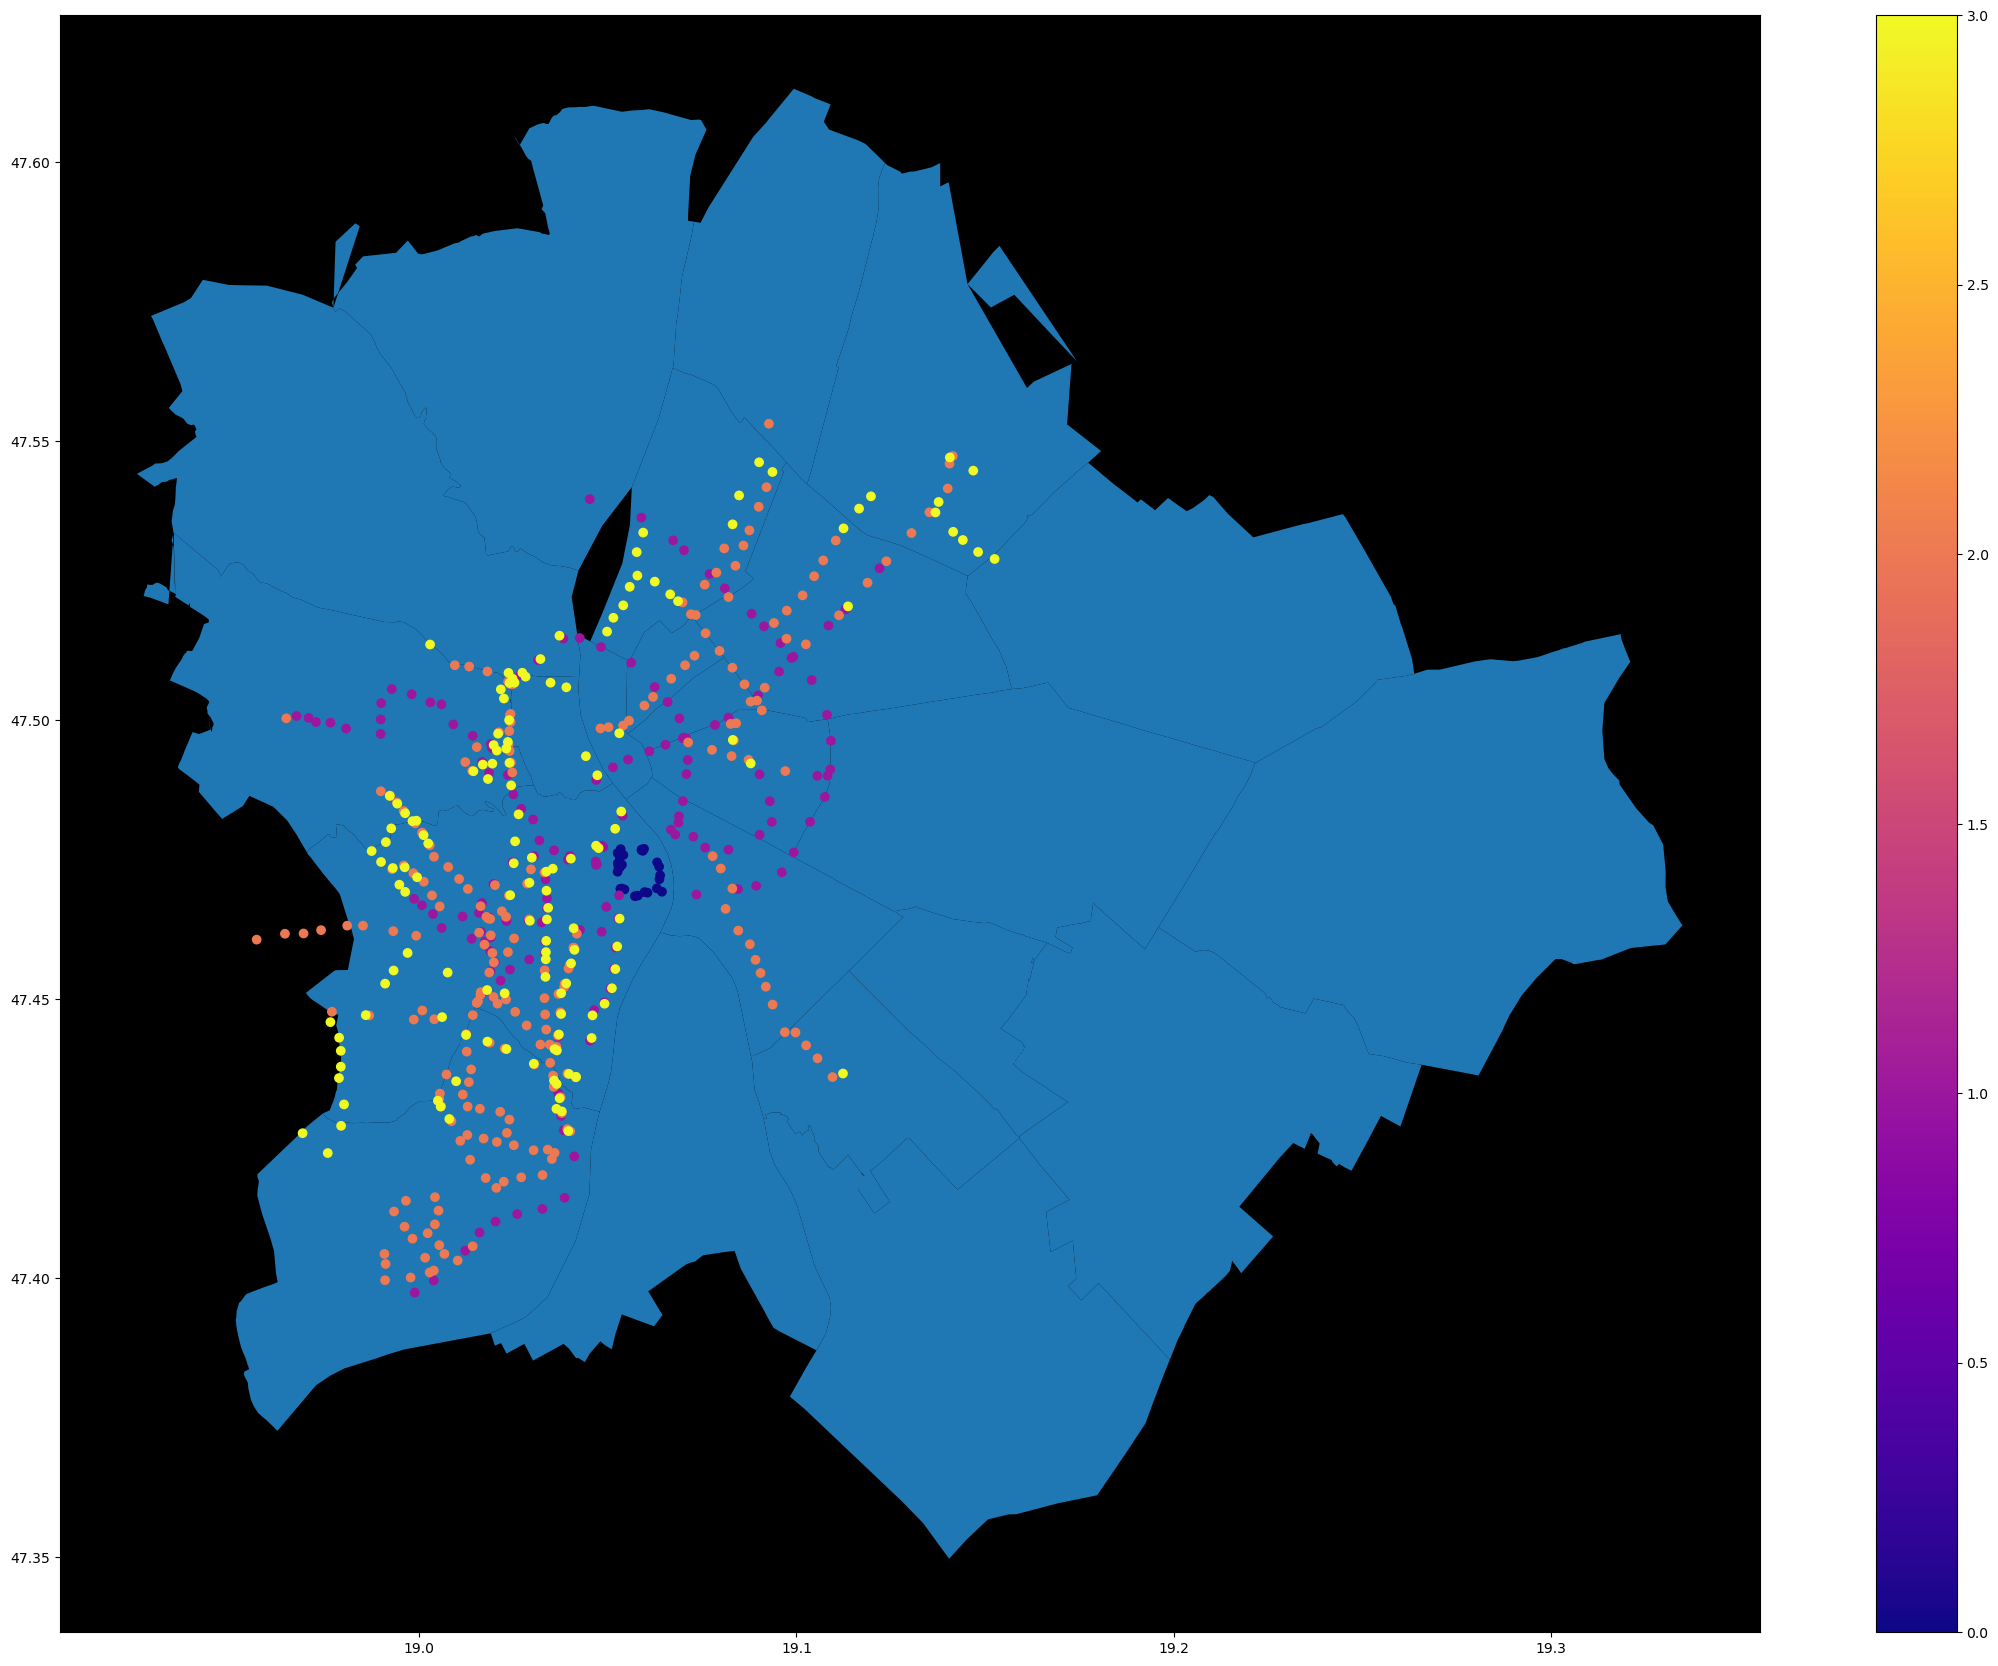

In [136]:
import matplotlib.pyplot as plt

def limit_to_bounding_box(gdf, bounding_box):
    return gdf.cx[bounding_box["west"]:bounding_box["east"],bounding_box["south"]:bounding_box["north"]]# Greater Sydney bounding box
bp_bb = {
    "north": 47.6025,
    "south": 47.3962,
    "west": 18.9545,
    "east": 19.2482
}


fig = plt.figure(figsize=(30,21))
ax = plt.axes()
ax.set(facecolor = "black")

gdf = limit_to_bounding_box(gdf, bp_bb)
gdf.plot(ax=ax)

bp_stops = limit_to_bounding_box(final_stops, bp_bb)
bp_stops.plot(ax=ax, cmap="plasma", column='k', legend=True)
#ax.set_title(f"Number of trips per day on Sydney Buses Network on {date:%d %B %Y}", fontsize=30)
#plt.savefig("Sydney Buses Network.jpeg")